In [28]:
import requests
from PIL import Image
from io import BytesIO

In [29]:
def download_img(url):
    response = requests.get(url)
    img = Image.open(BytesIO(response.content))
    return img

In [30]:
im1 = download_img('https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTxKvGY7rxZXh6wengzFmJadHFHOS2N_IN12g&usqp=CAU')
im1.save('image2.png')

In [31]:
im2 = Image.open(r'C:\Users\Lenovo\Pictures\Screenshots\Hills 1.png') # r is for raw string
im2.size

(1020, 735)

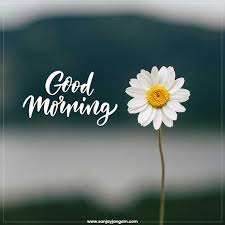

In [32]:
im1

In [33]:
im1.show()

In [34]:
im1.info

{'jfif': 257, 'jfif_version': (1, 1), 'jfif_unit': 0, 'jfif_density': (1, 1)}

In [35]:
im2.info

{'srgb': 0,
 'gamma': 0.45455,
 'dpi': (95.9866, 95.9866),
 'Creation Time': '2021:10:28 14:45:44'}

In [36]:
im1.mode # RGB

'RGB'

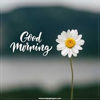

In [37]:
# resize image
im1.resize((100,100))

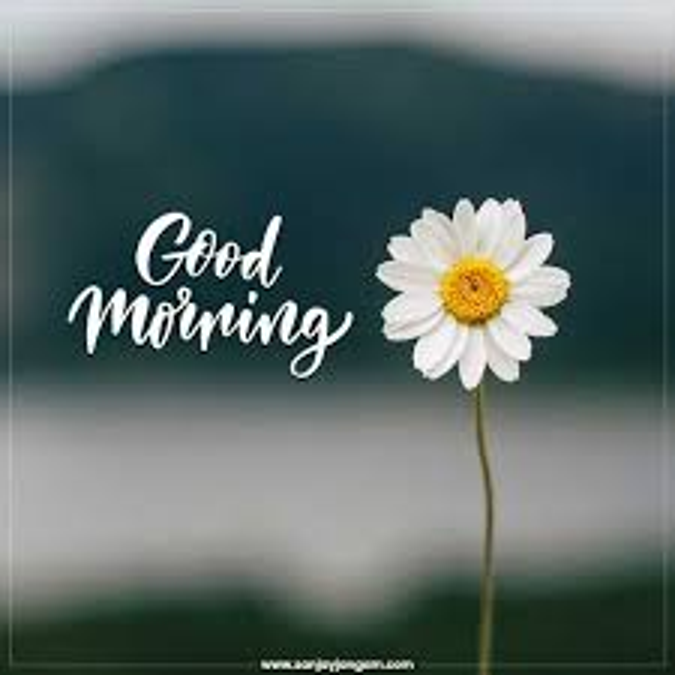

In [38]:
im1.resize((3* im1.width, 3* im1.height))

In [39]:
im1.resize((im1.width // 3, im1.height // 3)).save('image3.png')

In [40]:
from PIL import ImageDraw, ImageFont

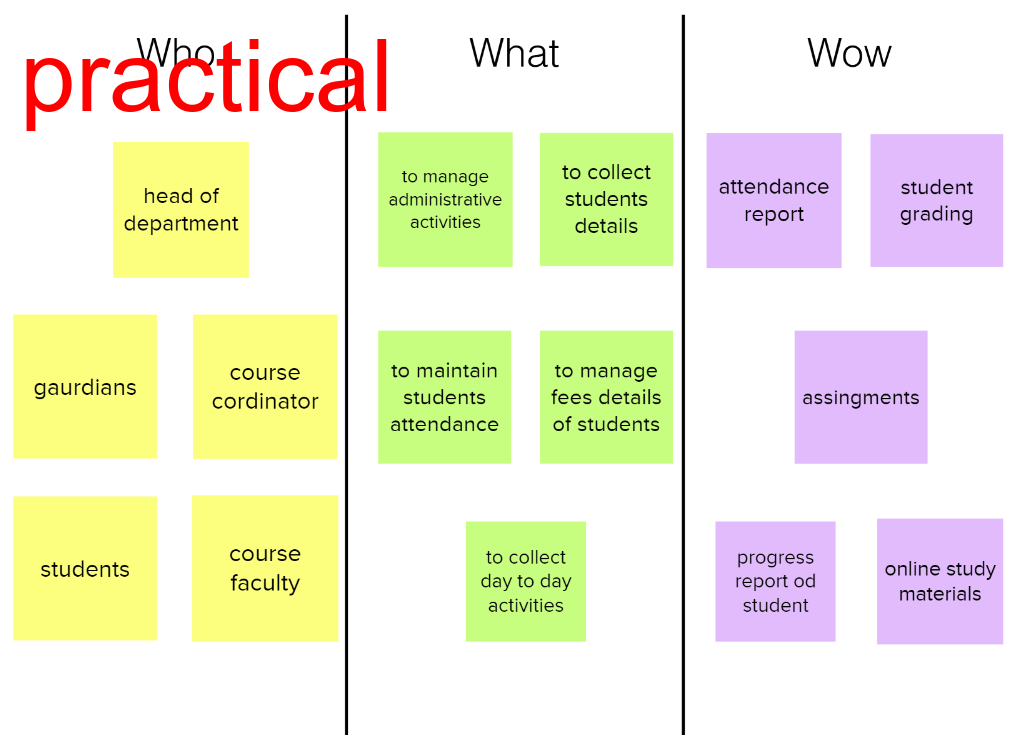

In [41]:
drawIm2 = ImageDraw.Draw(im2)
drawIm2.text((20,20), 'practical', fill='red', font=ImageFont.truetype('arial.ttf',100))
im2

In [42]:
im2.show()

21 oct 22

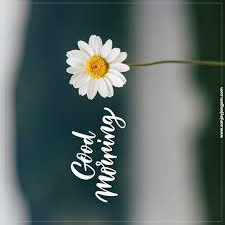

In [43]:
im1.rotate(90)

In [44]:
im2.rotate(30, expand=True, fillcolor='white').save('practical2.png')


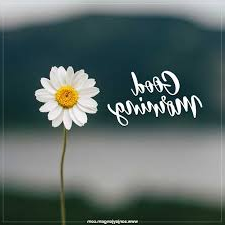

In [45]:
# IMAGE FLIP
im1.transpose(Image.Transpose.FLIP_LEFT_RIGHT)
# if u are getting error then use this
# im1.transpose(Image.FLIP_LEFT_RIGHT)

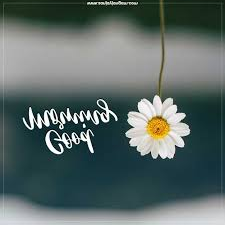

In [46]:
im1.transpose(Image.Transpose.FLIP_TOP_BOTTOM)

In [47]:
sky = download_img('https://img.freepik.com/free-photo/white-cloud-blue-sky_74190-2381.jpg?w=1800&t=st=1666358844~exp=1666359444~hmac=bfb53b92d5b4e0dbddb2ae526e20b8a3d581f0f191a15769445c05a38506ec6c')
sky.save('sky.jpg')

In [51]:
sheep = download_img('https://southeastagnet.com/wp-content/uploads/2019/09/sheep.shutterstock_1037794738-1024x683.jpg')
sheep.save('sheep.jpg')

In [52]:
print("Sky image resolution: ", sky.size)
print('Sky format: ', sky.format)
print("Sheep image resolution: ", sheep.size)
print('Sheep format: ', sheep.format)

Sky image resolution:  (1800, 1200)
Sky format:  JPEG
Sheep image resolution:  (1024, 683)
Sheep format:  JPEG


In [53]:
def blend_image(image_1, image_2, mode='RGB', size=(100,100), alpha=0.5):
    image_1 = image_1.resize(size)
    image_2 = image_2.resize(size)
    image_1 = image_1.convert(mode)
    image_2 = image_2.convert(mode)
    blended_image = Image.blend(image_1, image_2, alpha)
    return blended_image

In [54]:
blend_image(im2, im1, alpha=0.3, size=(1000,1000)).show()

In [58]:
icon = Image.open(r'C:\Users\Lenovo\Downloads\download-flat.png')

In [59]:
im1 = im1.convert('RGBA')
im1.paste(icon, (0,0))
im1.show()

In [60]:
im1.paste(icon, (200,200))
im1.show()

In [61]:
def add_watermark(image, watermark, style=None, pos=(0,0)):
    image = image.convert('RGBA')                   # convert image to RGBA
    watermark = watermark.convert('RGBA')           # convert watermark to RGBA
    if style == 'tile':
        for x in range(0, image.width, watermark.width):
            for y in range(0, image.height, watermark.height):
                image.paste(watermark, (x,y), mask=watermark)
    elif style is None:
        image.paste(watermark, pos, mask=watermark)
    return image

In [62]:
add_watermark(im2, icon, pos=(im2.width-200,im2.height-200)).show()

In [63]:
from PIL import ImageFilter

In [64]:
filters  = [
    ImageFilter.BLUR,
    ImageFilter.CONTOUR,
    ImageFilter.DETAIL,
    ImageFilter.EDGE_ENHANCE,
    ImageFilter.EMBOSS,
    ImageFilter.FIND_EDGES,
    ImageFilter.SMOOTH,
    ImageFilter.MaxFilter(7),
    ImageFilter.MinFilter(7),
    ImageFilter.MedianFilter(3),
    ImageFilter.ModeFilter(3),
    ImageFilter.GaussianBlur(30),
    ImageFilter.RankFilter(3, 3),
]

for i,filter in enumerate(filters):
    sheep.filter(filter).save(f'sheep_{i}.png')